In [1]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
mpl.rc('savefig', dpi=200)
params = {'figure.dpi' : 200,
          'figure.figsize' : (12, 10),
          'axes.axisbelow' : True,
          'lines.antialiased' : True,
          'axes.titlesize' : 'xx-large',
          'axes.labelsize' : 'x-large',
          'xtick.labelsize' : 'large',
          'ytick.labelsize' : 'large'}

for (k, v) in params.iteritems():
    plt.rcParams[k] = v

In [3]:
df = pd.read_csv("DATA/babs_master/merged_master.csv", low_memory=False)

In [4]:
df_station = pd.read_csv("DATA/babs_master/station_master.csv")

### Duration

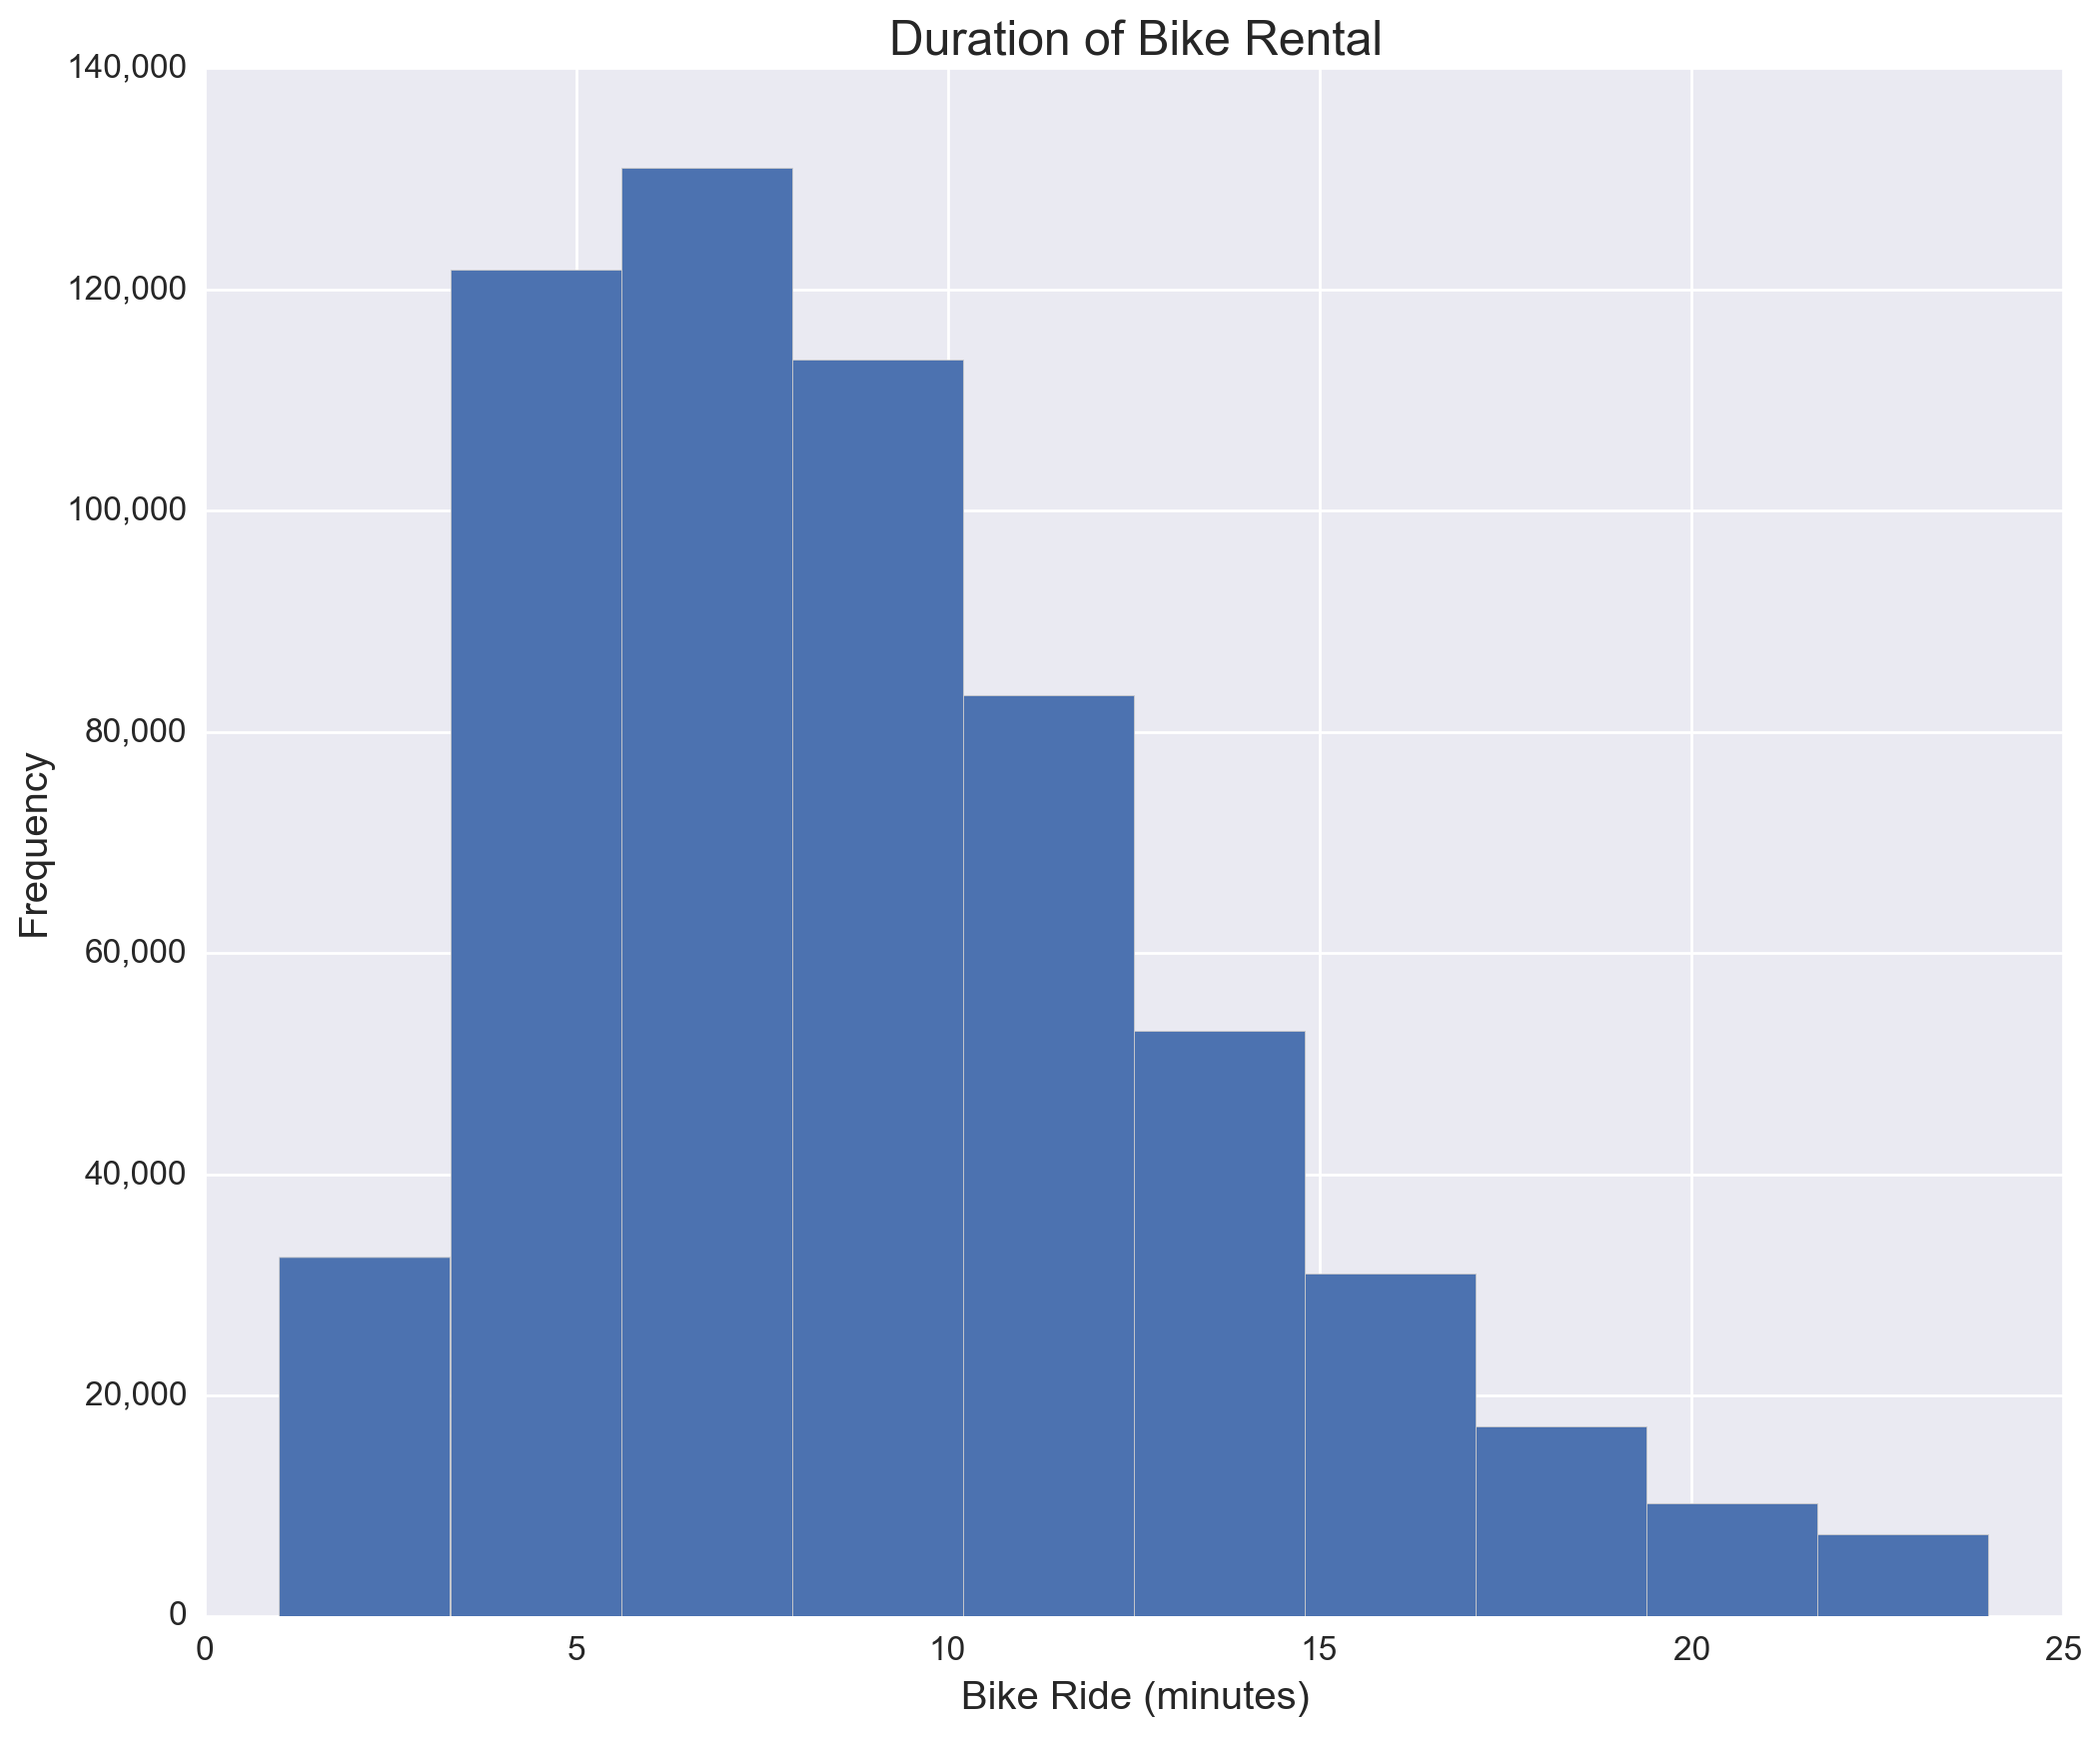

In [5]:
df = df[df['Duration'] < 1440]
df['minutes'] = df['Duration'] /60

plt.hist(df['minutes'], bins=10,
         range=(df['minutes'].min(),
                df['minutes'].max()),
         edgecolor='#cccccc')

plt.title("Duration of Bike Rental")
plt.xlabel("Bike Ride (minutes)")
plt.ylabel("Frequency")

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)

### Subscription Type

In [6]:
df['Subscription Type'].value_counts()

Subscriber    540819
Customer       60422
Name: Subscription Type, dtype: int64

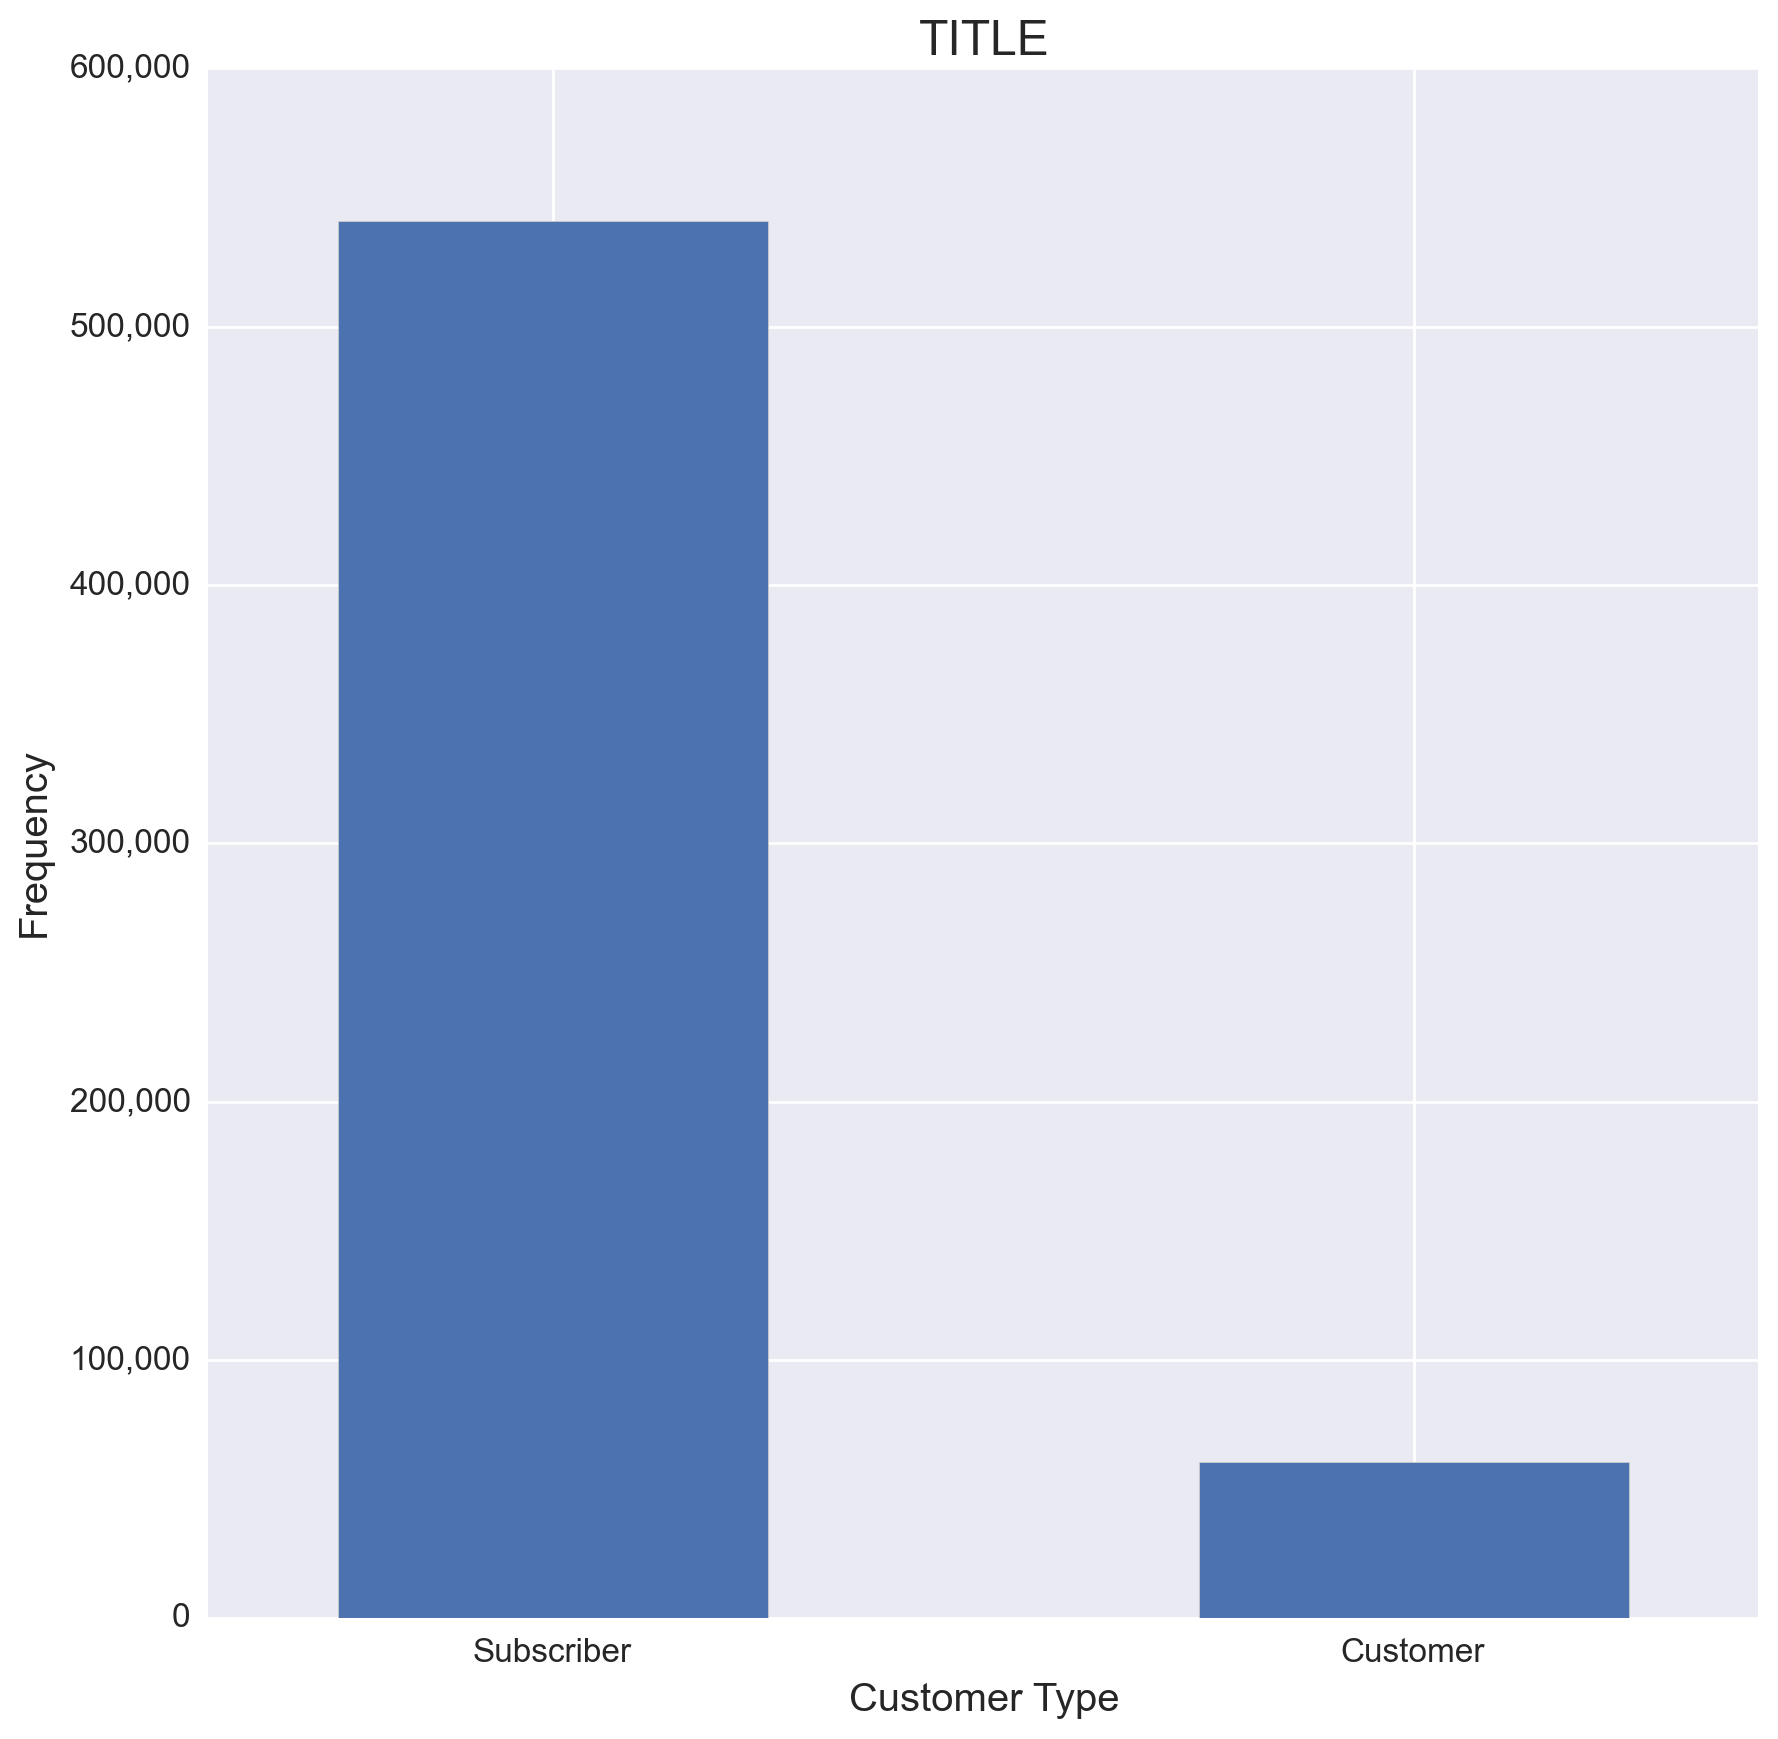

In [7]:
y = [df['Subscription Type'].value_counts()[0], df['Subscription Type'].value_counts()[1]]
N = len(y)
x = range(N)

plt.figure(figsize=(10, 10))
plt.bar(x, y, width=0.5, align='center', edgecolor='#cccccc')
plt.xticks([0, 1], ['Subscriber', 'Customer']);

plt.title("TITLE")
plt.xlabel("Customer Type")
plt.ylabel("Frequency")

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)

### Dock Counts

In [8]:
stations = df_station.copy()
stations.sort(columns=['landmark', 'dockcount'], ascending=[True, False], inplace=True)
stations.reset_index(drop=True, inplace=True)

/Users/JS/.virtualenvs/geospatial/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


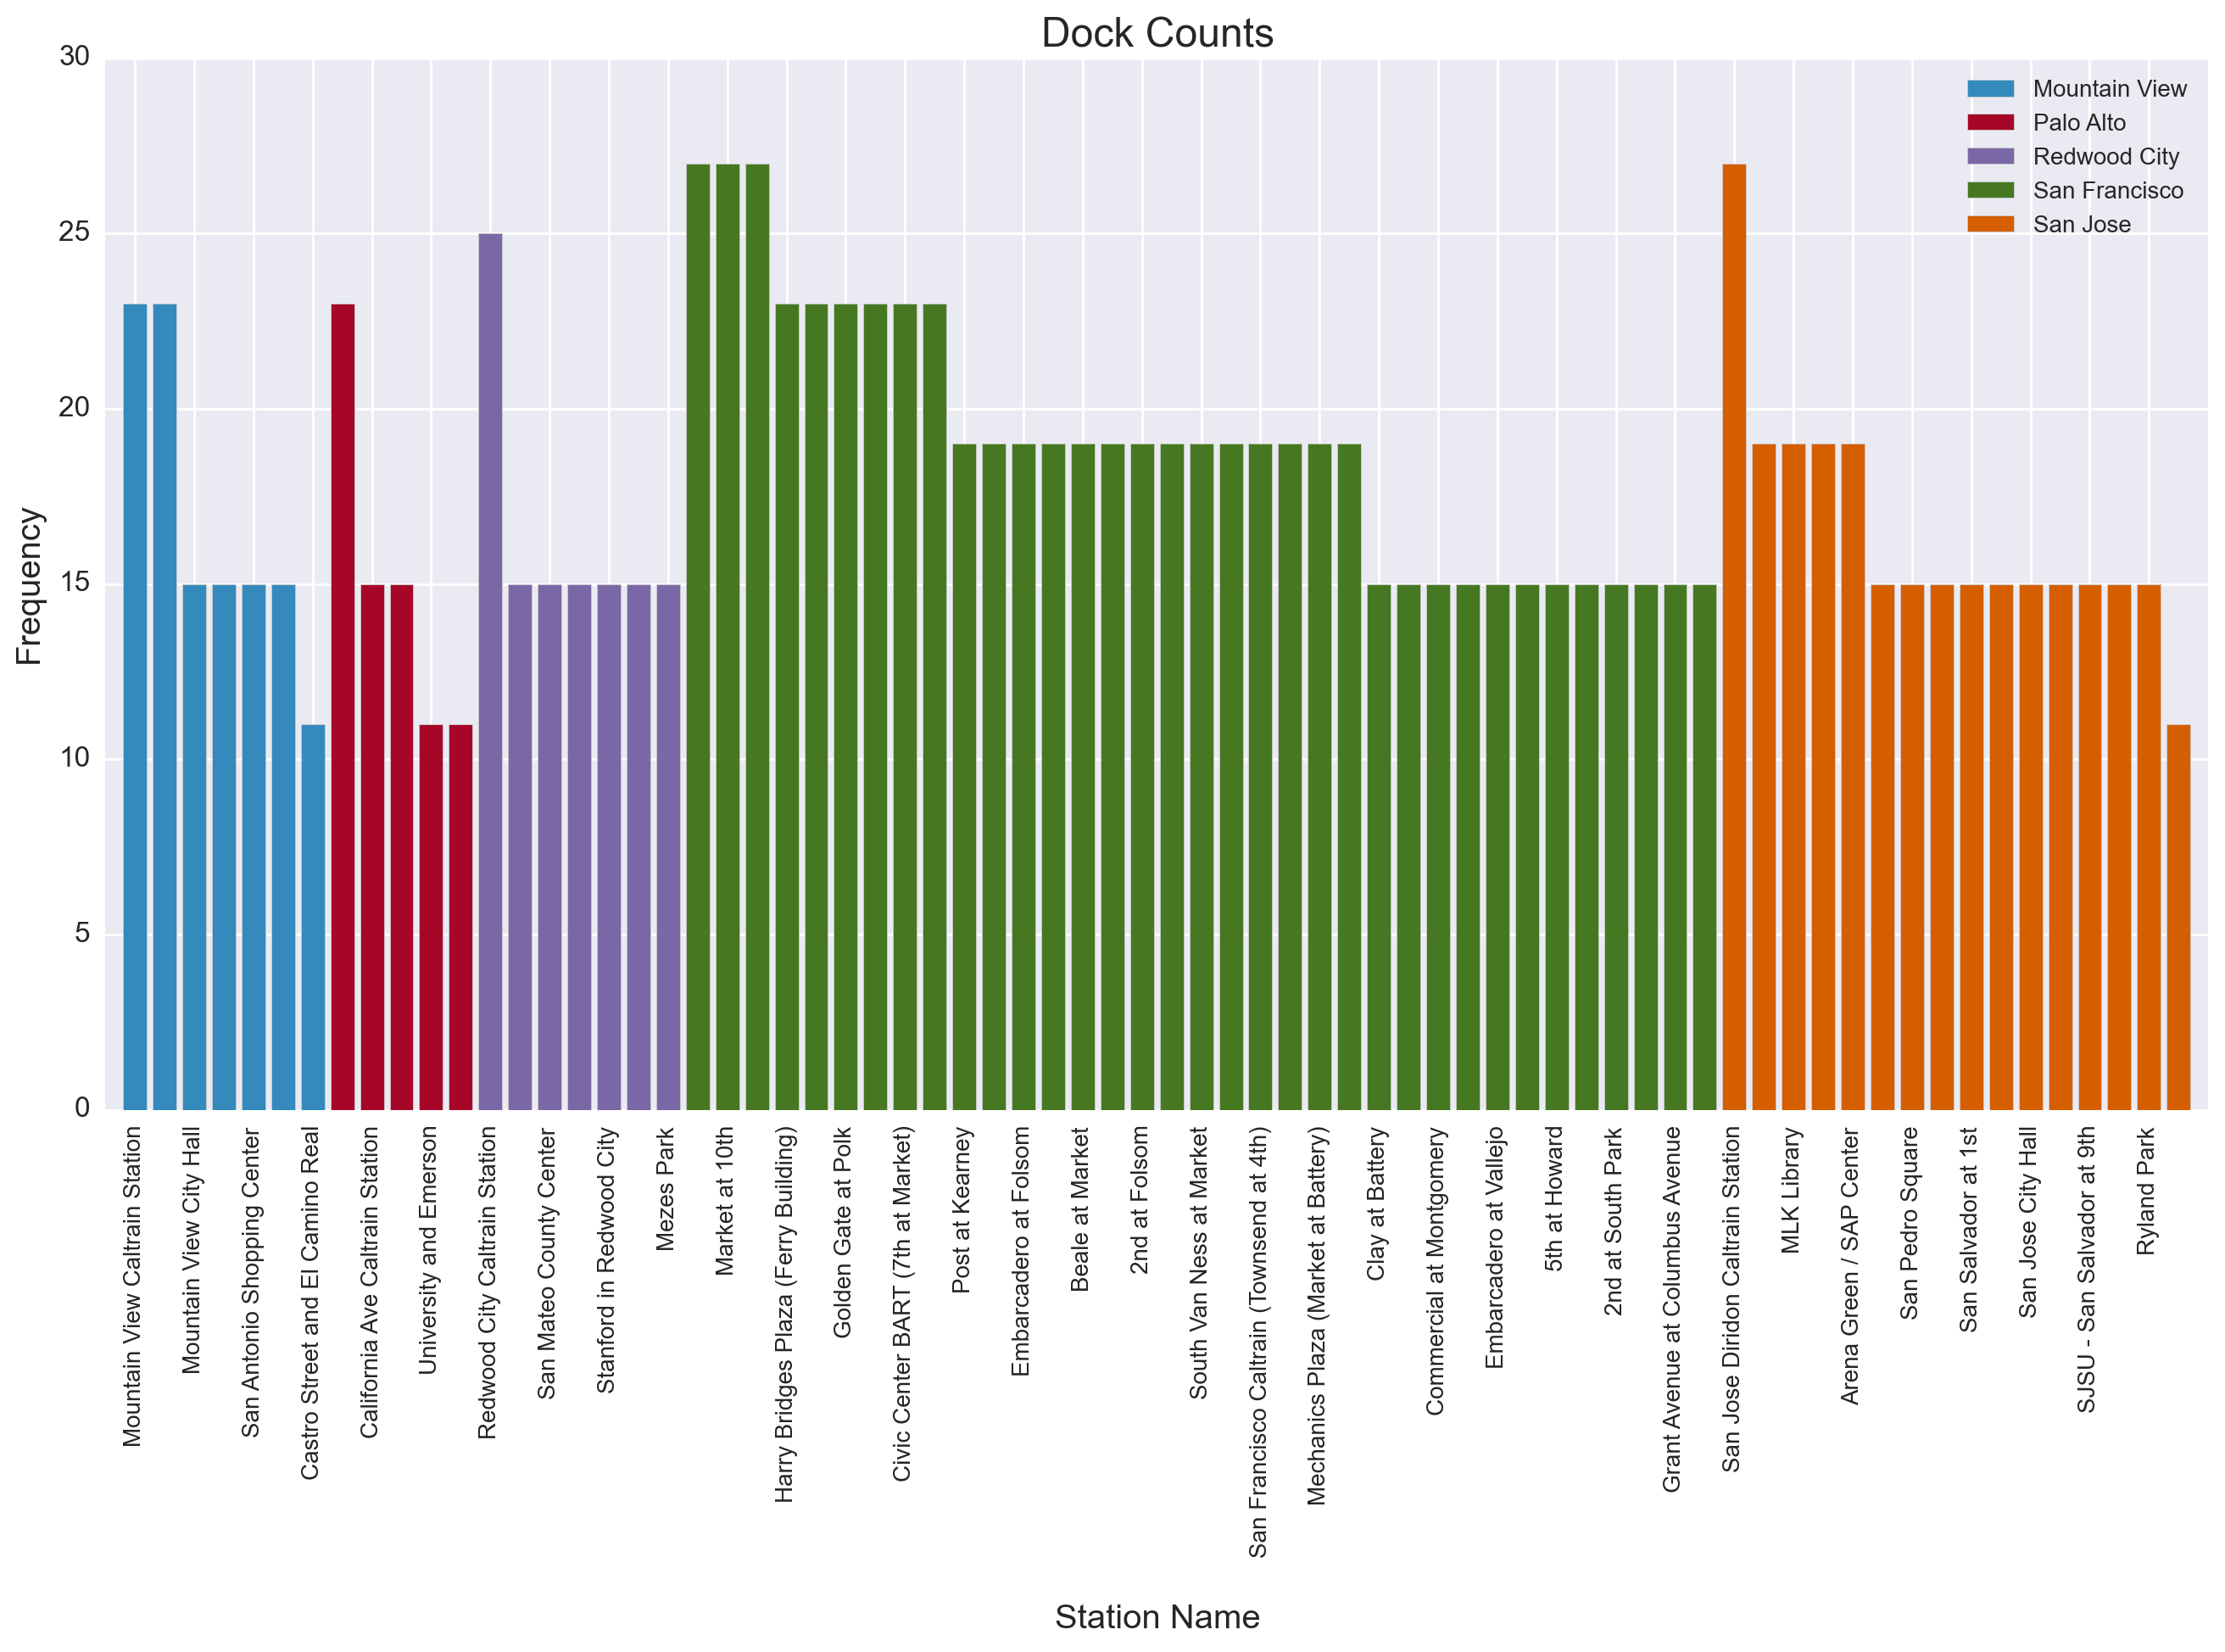

In [9]:
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00',
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

plt.figure(figsize=(16, 8))

for i, s in enumerate(stations.landmark.unique()):
    tdf = stations[stations.landmark==s]
    plt.bar(tdf.index, tdf.dockcount,
            width=0.8, align='center',
            facecolor=colors[i], edgecolor='#cccccc',
            label=s)

plt.title("Dock Counts")
plt.xlabel("\nStation Name")
plt.ylabel("Frequency")

plt.xlim(-1, stations.index.max()+1);
plt.xticks(stations.index.tolist()[::2],
           stations.name.tolist()[::2],
           rotation=90, fontsize=10);

plt.legend()

### Start Station

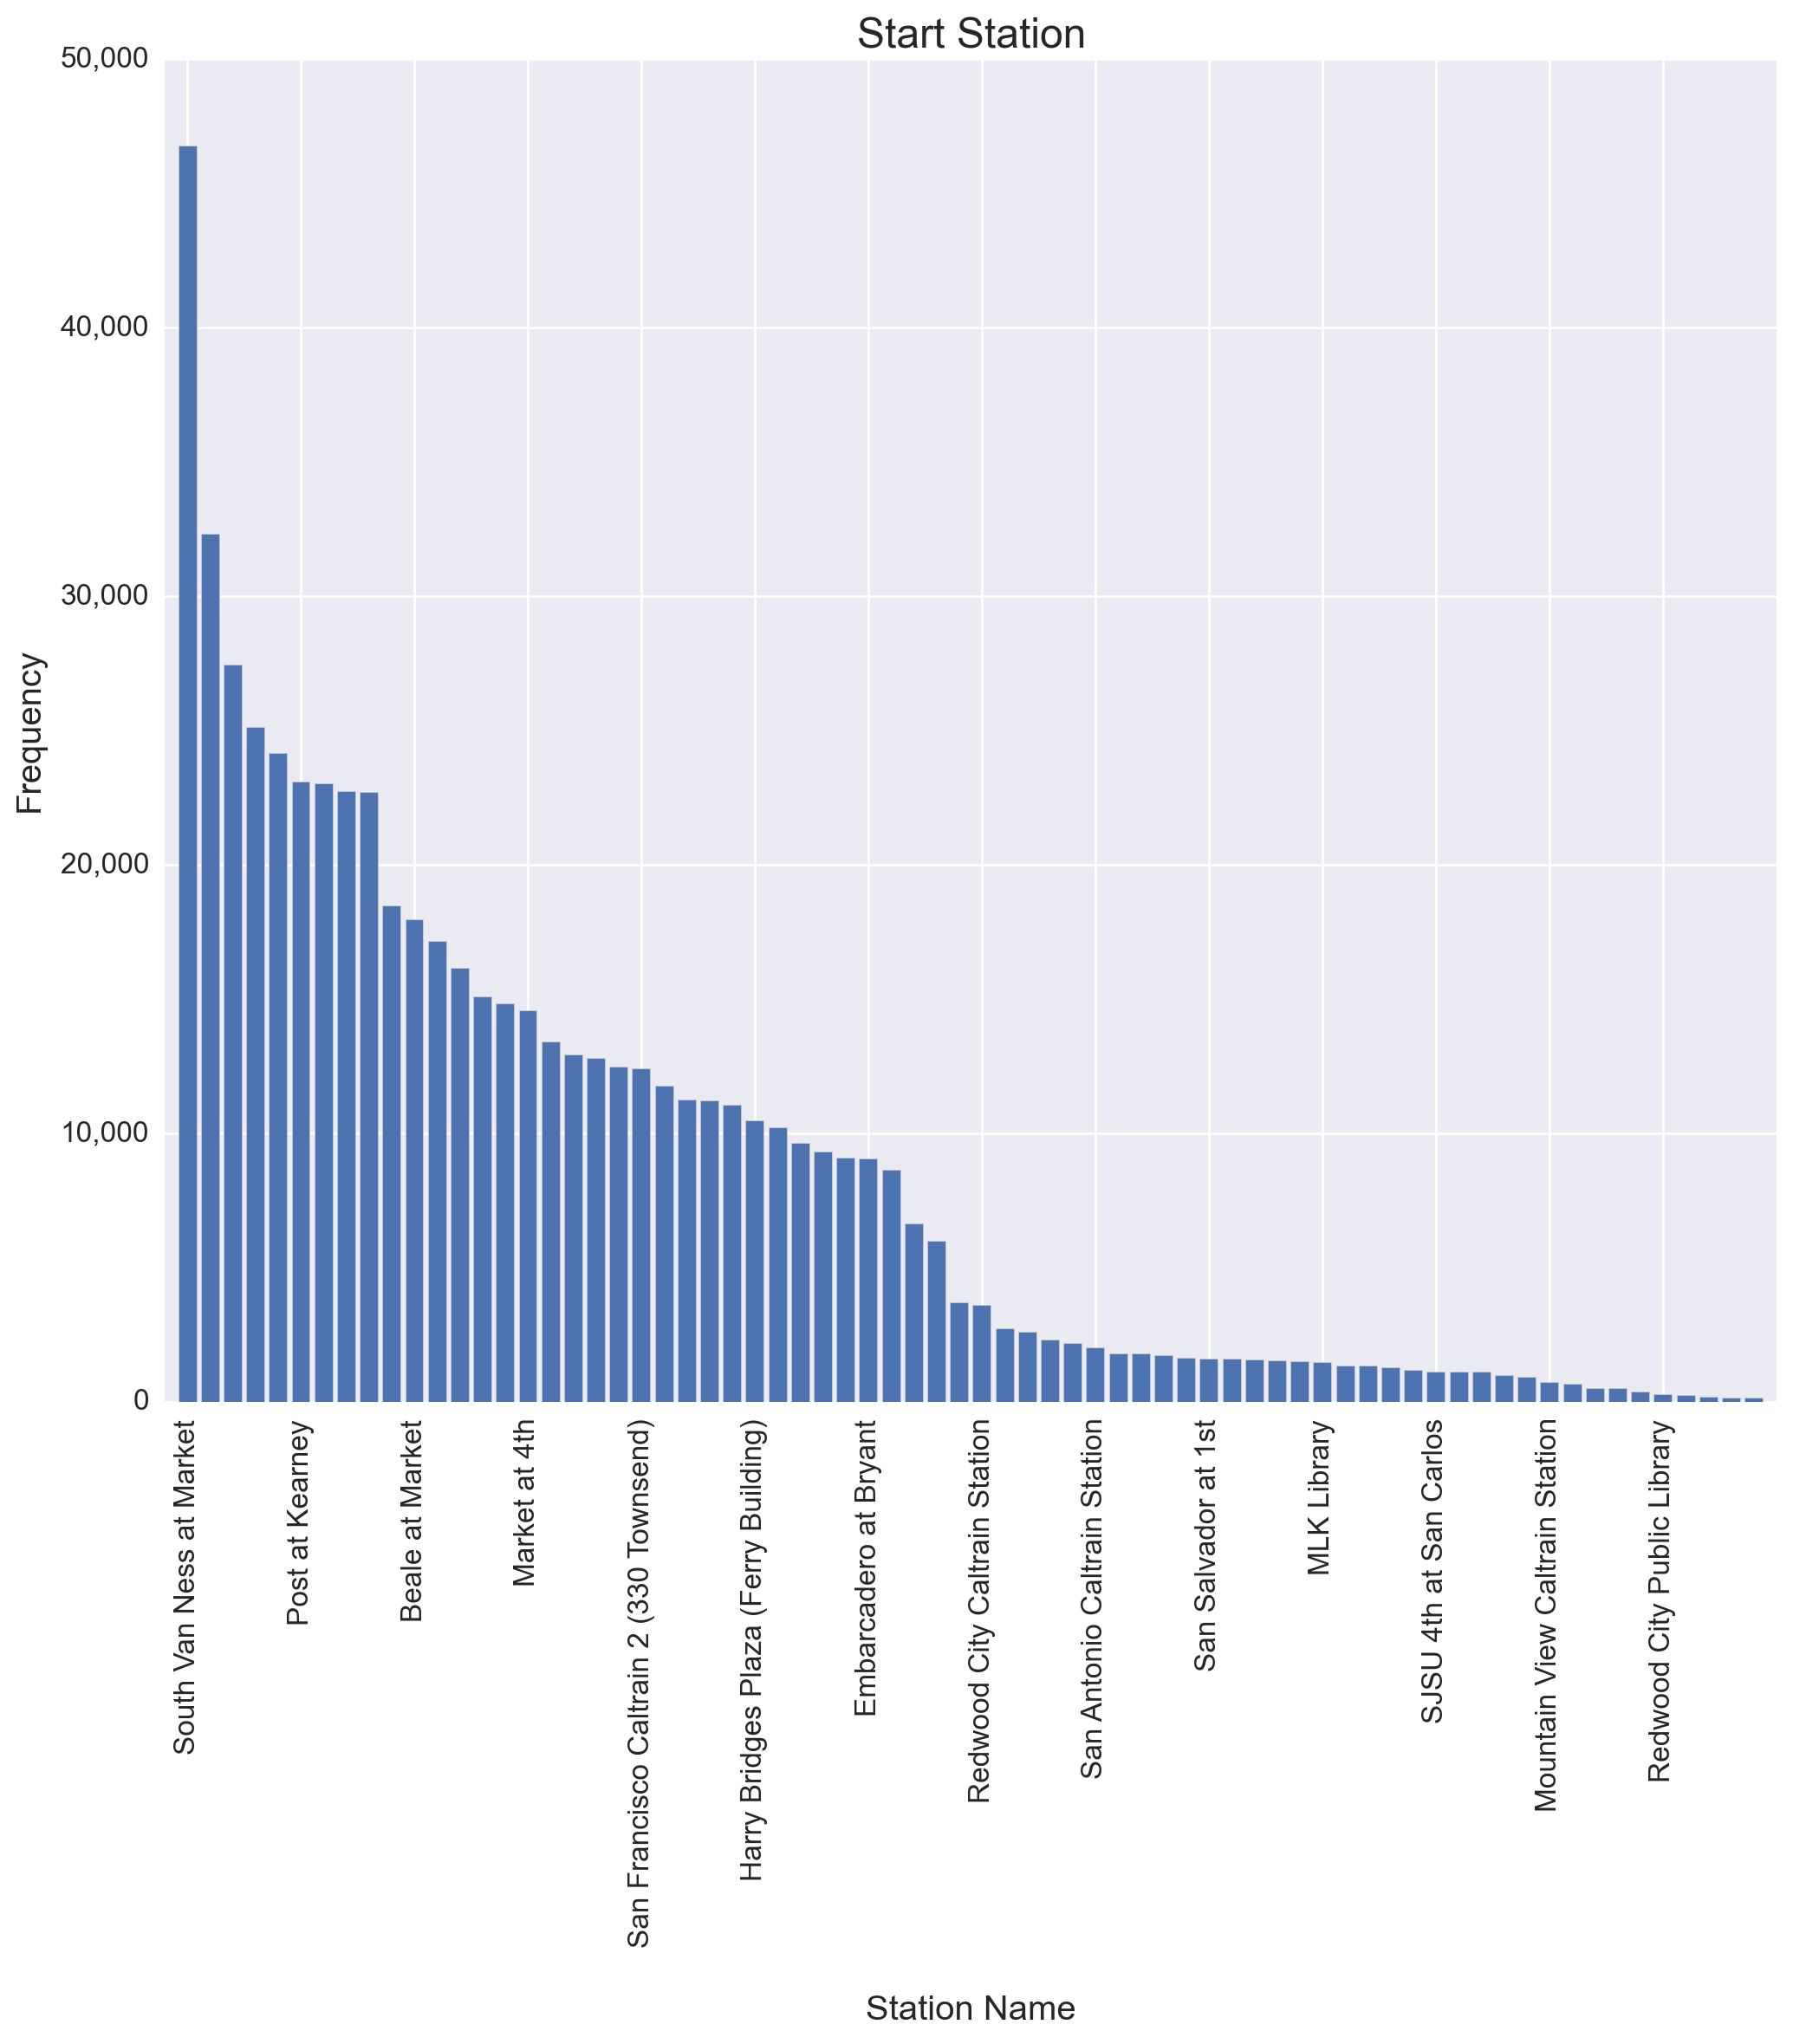

In [10]:
y = [df['Start Station'].value_counts()[i] for i in range(len(df['Start Station'].unique()))]
N = len(y)
x = range(N)
labels = df['Start Station'].unique()

plt.bar(x, y, width=0.8, align='center', edgecolor='#cccccc')

plt.title("Start Station")
plt.xlabel("\nStation Name")
plt.ylabel("Frequency")

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)

plt.xlim(-1, N);
plt.xticks(range(len(labels))[::5], labels[::5], rotation=90);

### End Station

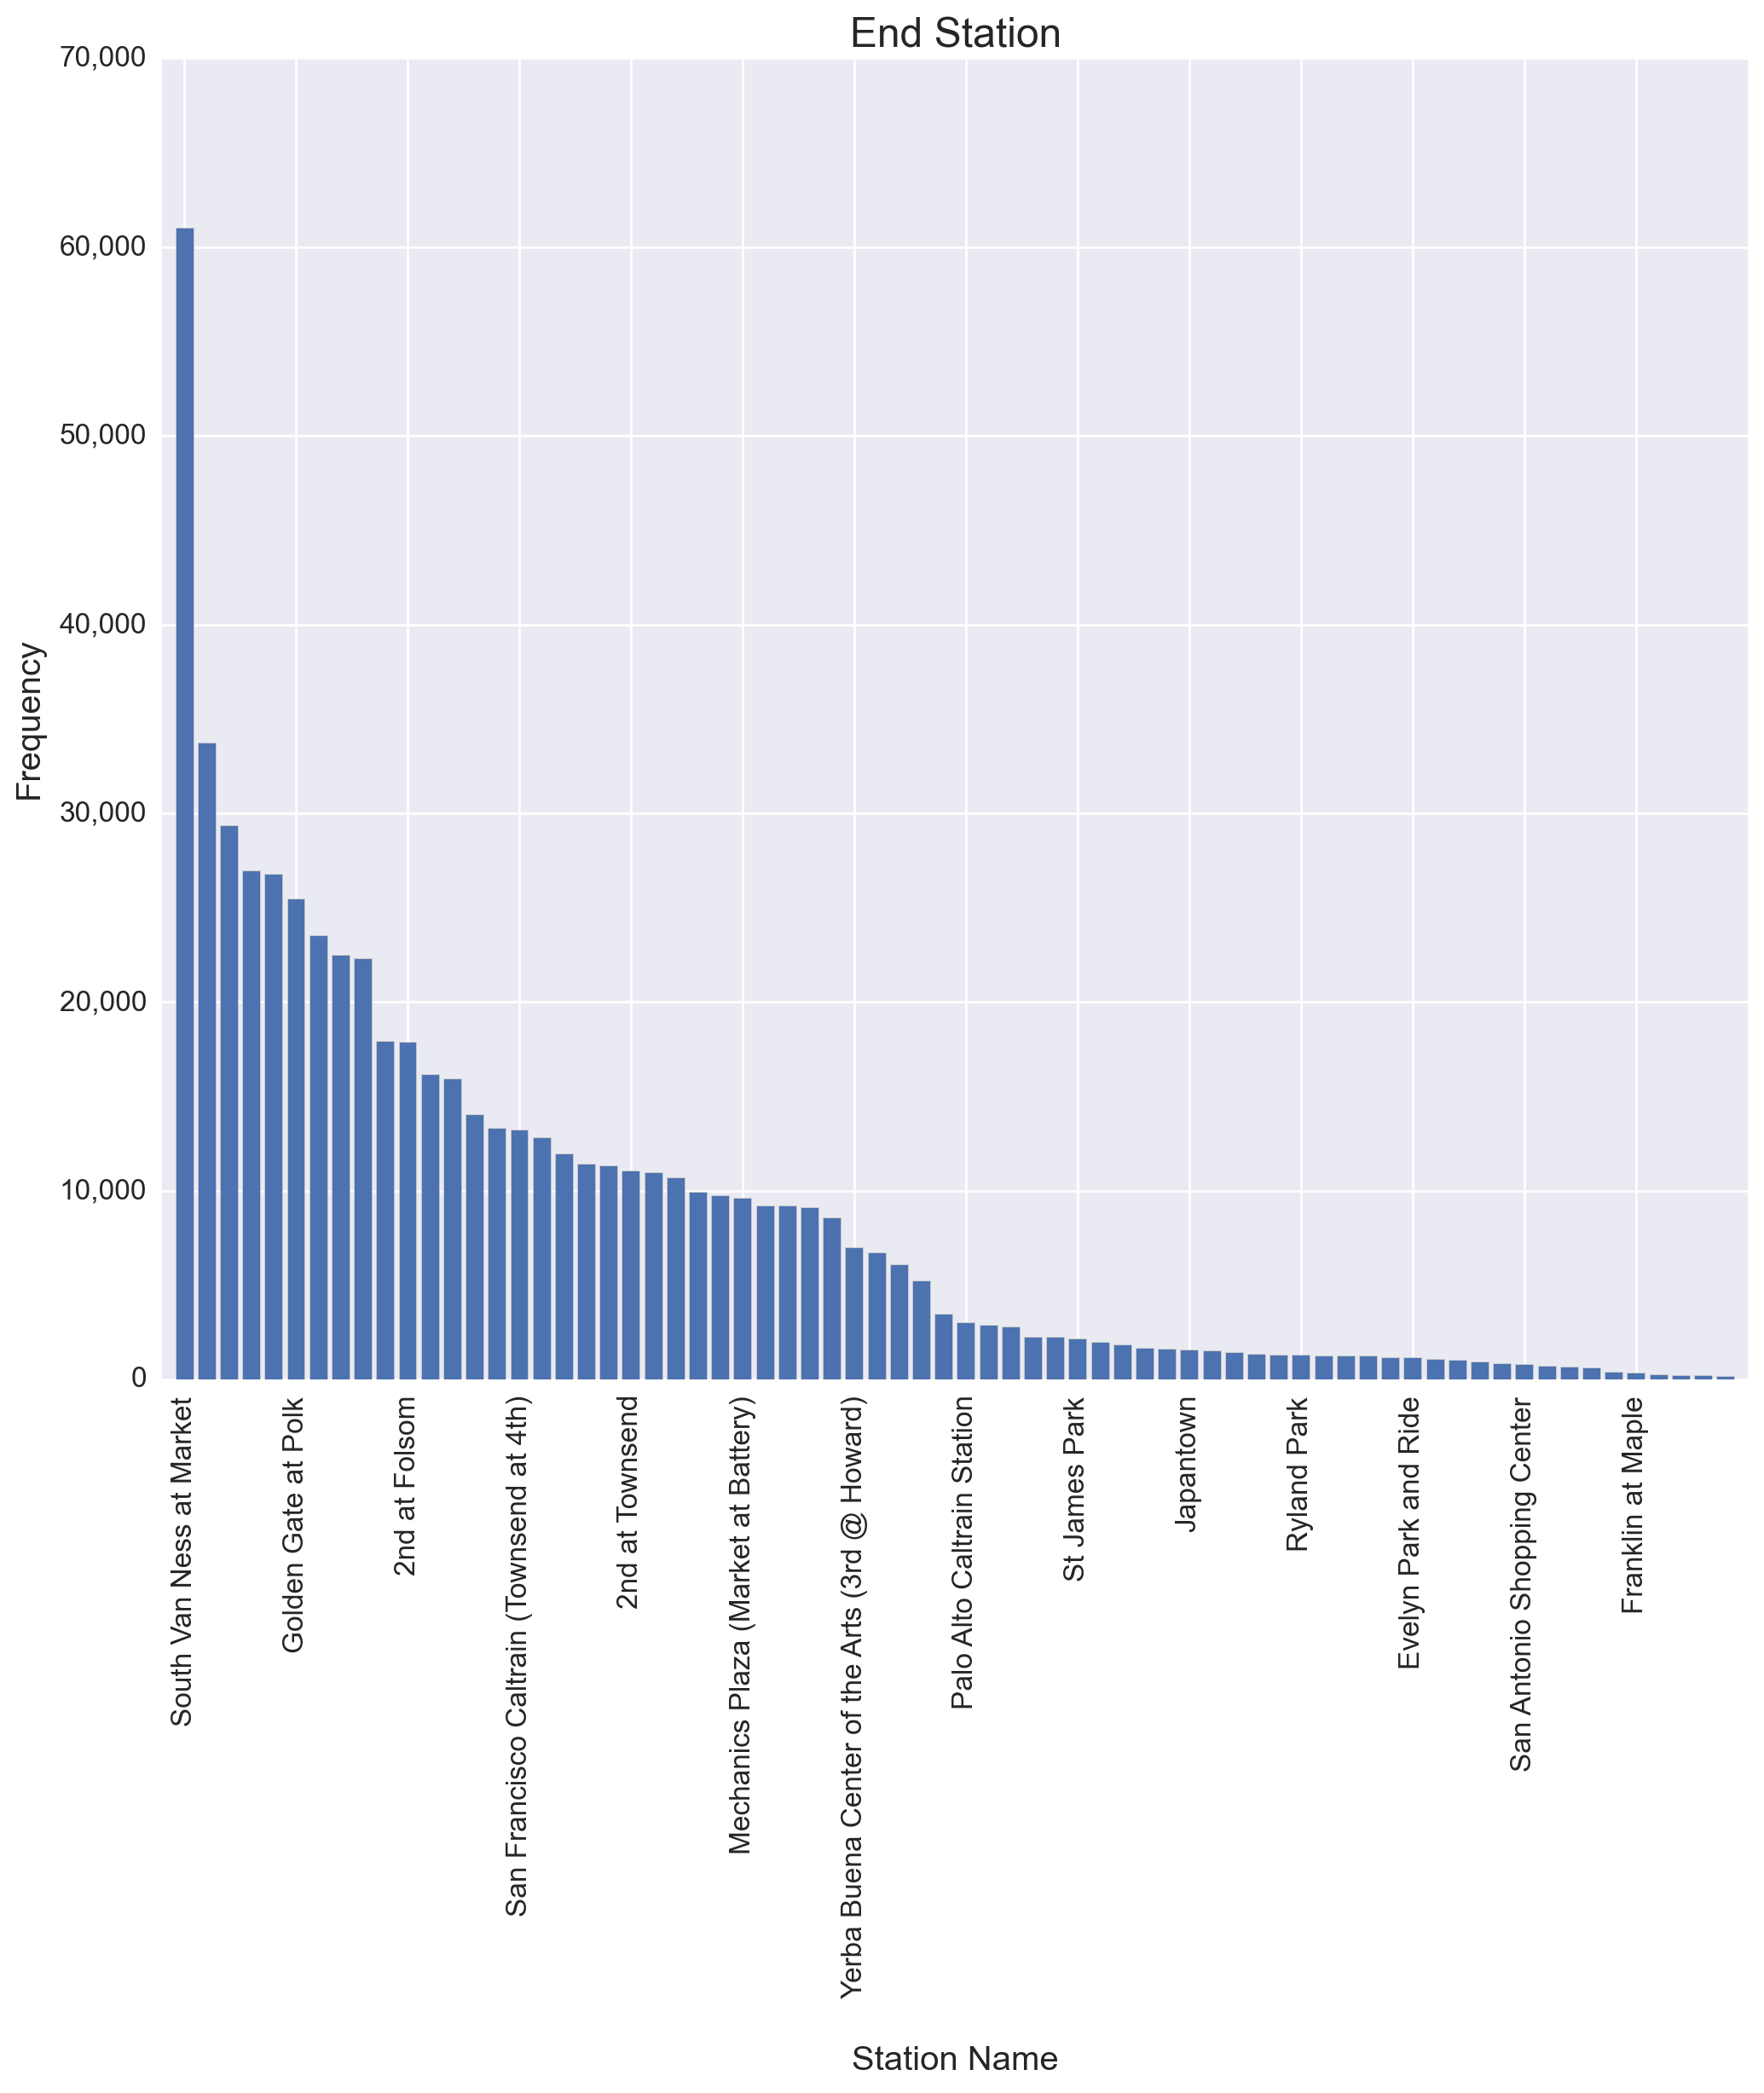

In [11]:
y = [df['End Station'].value_counts()[i] for i in range(len(df['End Station'].unique()))]
N = len(y)
x = range(N)
labels = df['End Station'].unique()

plt.bar(x, y, width=0.8, align='center', edgecolor='#cccccc')

plt.title("End Station")
plt.xlabel("\nStation Name")
plt.ylabel("Frequency")

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)

plt.xlim(-1, N);
plt.xticks(range(len(labels))[::5], labels[::5], rotation=90);

### Start Zip Code/Lat-Long

### End Zip code/Lat- Long

# New Features

## Start

In [12]:
month =[]
day_of_month =[]
hour_of_day =[]
day_of_week =[]
weekend = []

for i in range(len(df['Start Date Time'].values)):
    date = datetime.strptime(df['Start Date Time'].values[i], "%m/%d/%Y %H:%M")
    moy = date.month
    dom = date.day
    hod = date.hour
    month.append(moy)
    day_of_month.append(dom)
    hour_of_day.append(hod)
    day_of_week.append(date.isoweekday())
    if date.isoweekday() in range(1, 6):
        weekend.append(0)
    else:
        weekend.append(1)
df['month'] = month
df['day_of_month'] = day_of_month
df['hour_of_day'] = hour_of_day
df['day_of_week'] = day_of_week
df['weekend'] = weekend

### Day of the Week

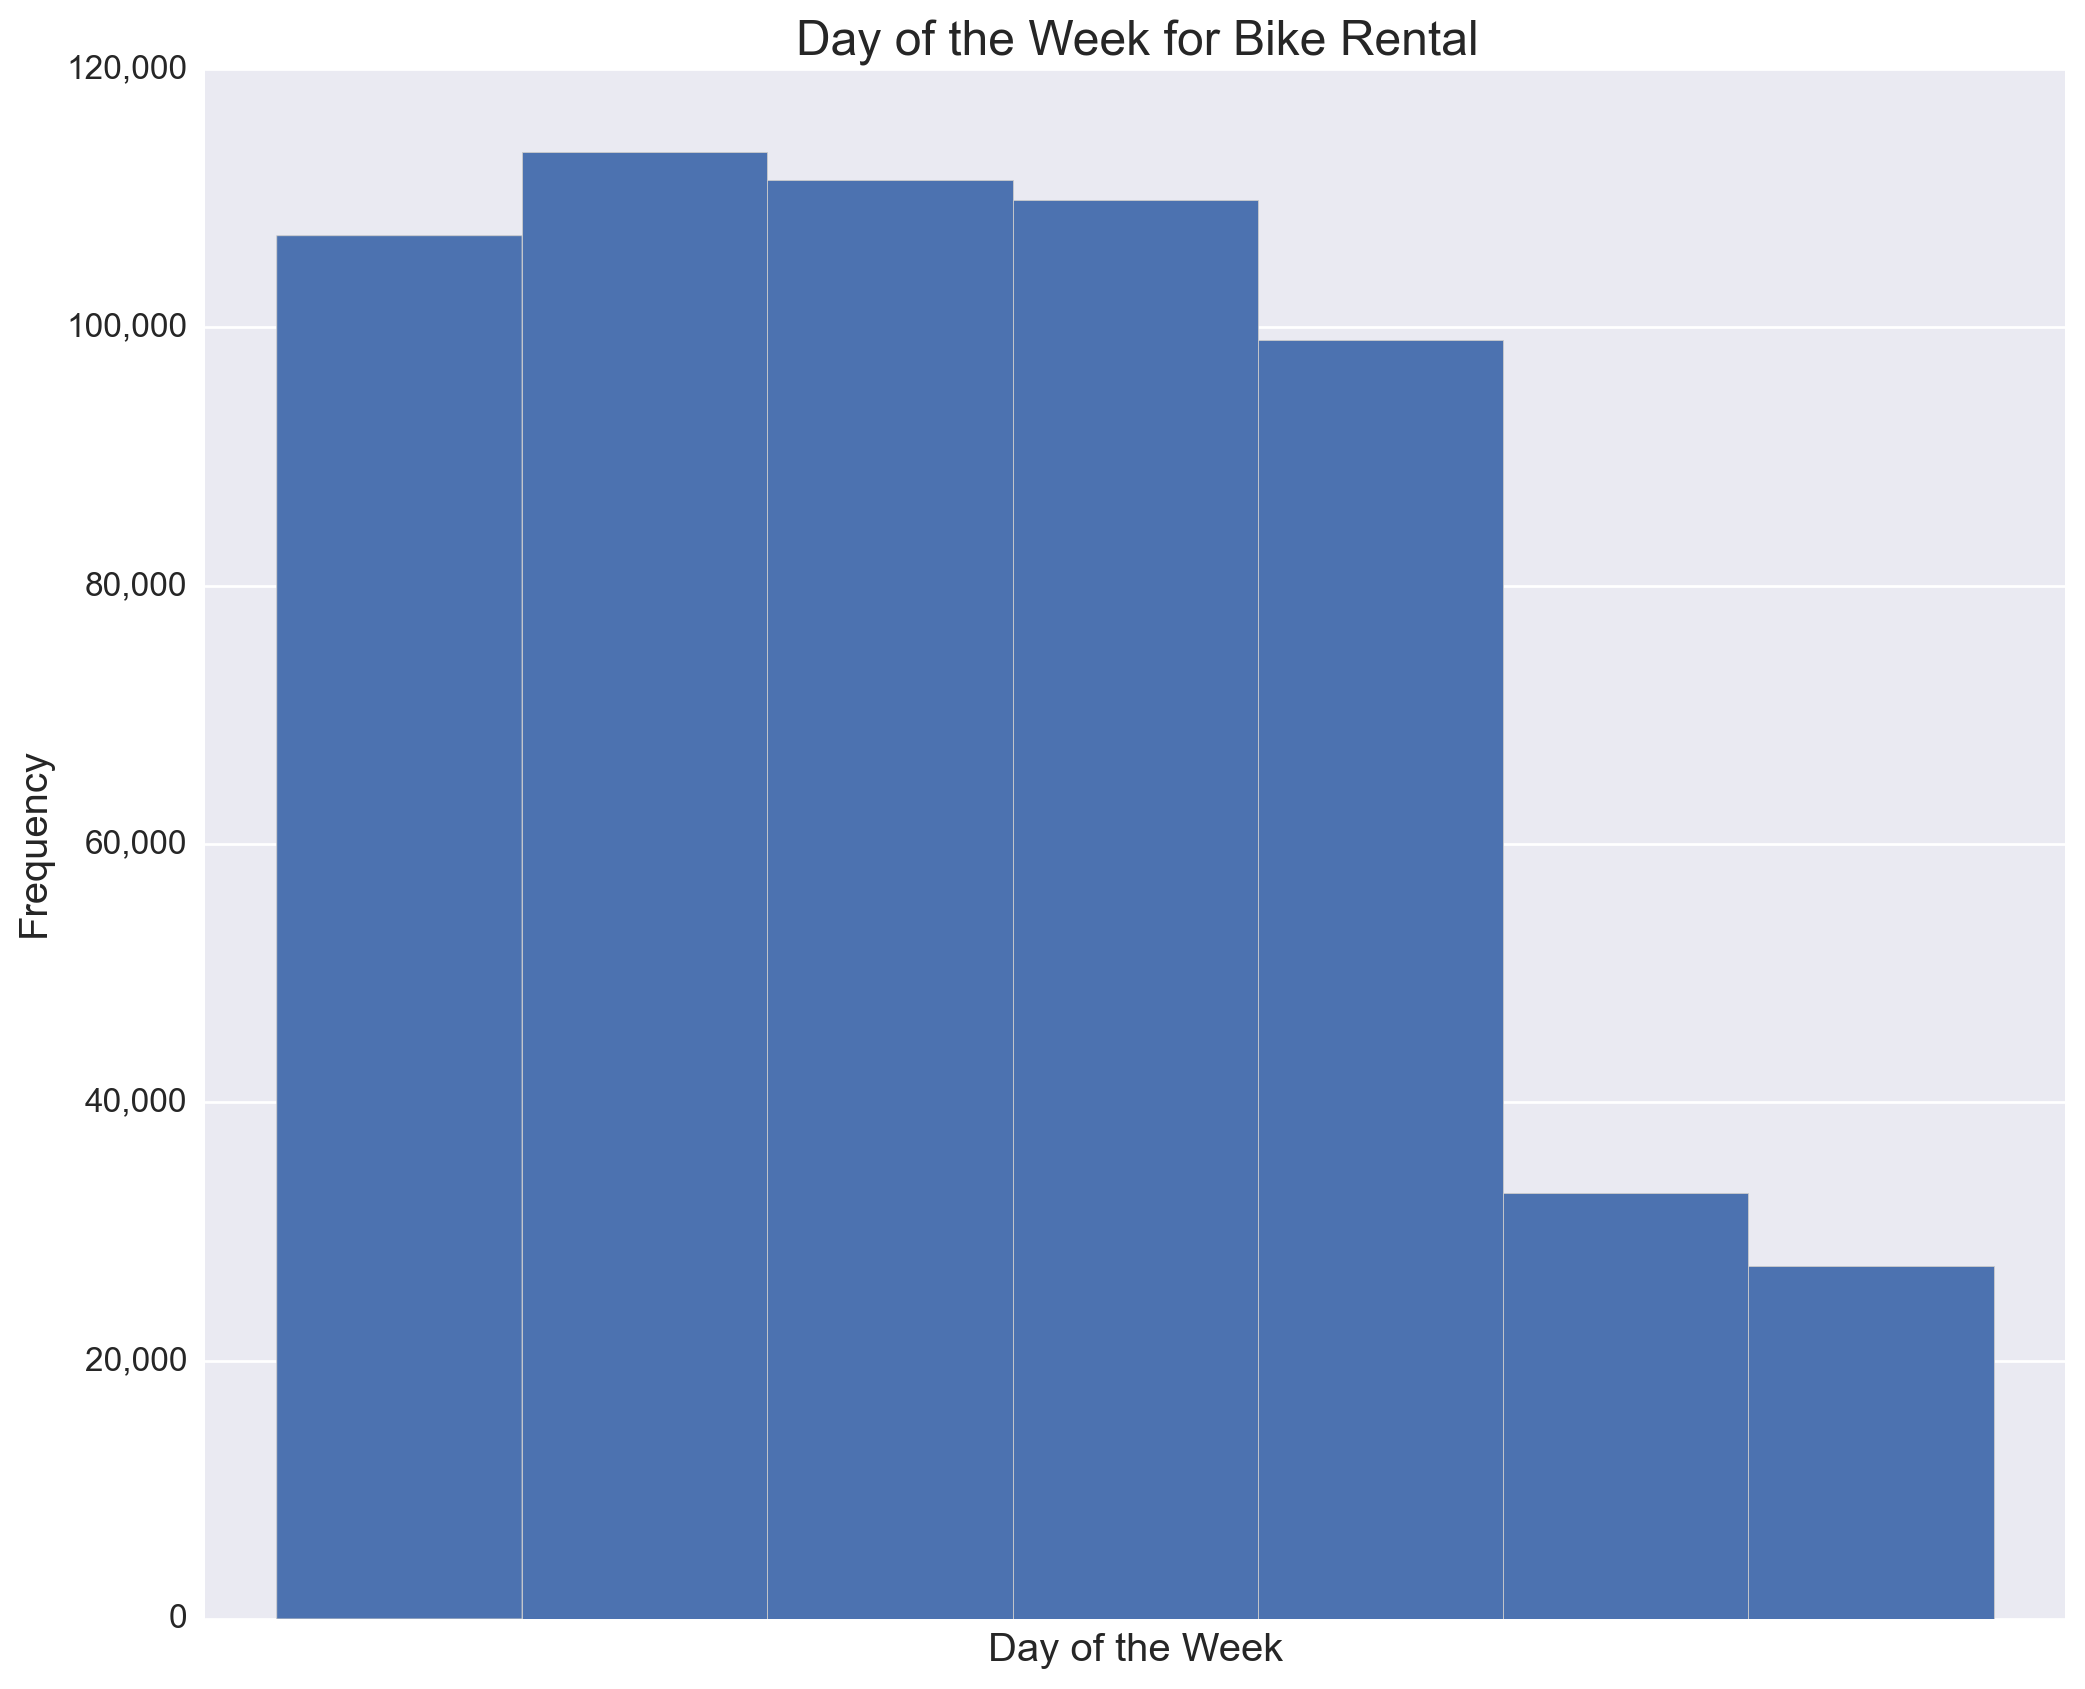

In [28]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.hist(df['day_of_week'],
         bins=7,
         range=(df['day_of_week'].min(),
                df['day_of_week'].max()),
         edgecolor='#cccccc')

plt.title("Day of the Week for Bike Rental")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)

plt.xlim(0.75, 7.25);
plt.xticks([]);

### Hour of the Day

[]

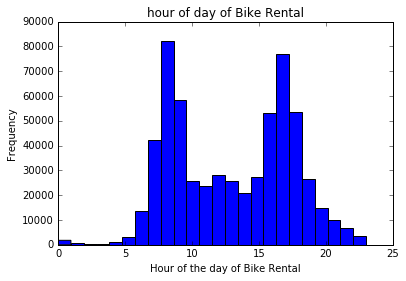

In [16]:
plt.hist(df['hour_of_day'], bins = 24, range = (df['hour_of_day'].min(),df['hour_of_day'].max()))
plt.title("hour of day of Bike Rental")
plt.xlabel("Hour of the day of Bike Rental")
plt.ylabel("Frequency")

plt.plot()

### Month

[]

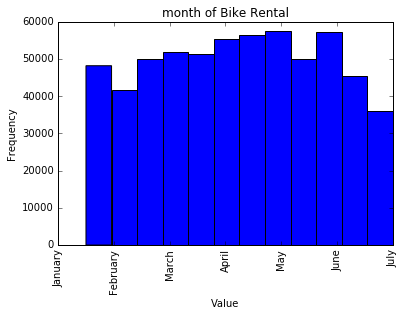

In [17]:
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots()
plt.hist(df['month'], bins = 12, range = (df['month'].min(),df['month'].max()))
ax.set_xticklabels(labels, rotation='vertical')
plt.title("month of Bike Rental")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.plot()

### Weekend/Weekday

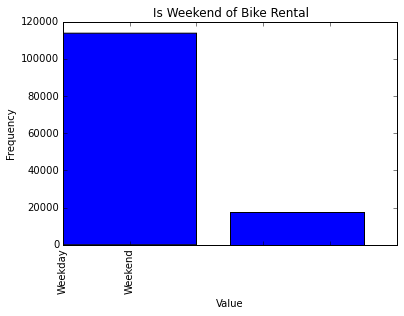

In [104]:
labels = ['Weekday', 'Weekend']
fig, ax = plt.subplots()
plt.hist(df['weekend'],bins = 2, width = .4, range = (df['weekend'].min(),df['weekend'].max()) )
plt.title("Is Weekend of Bike Rental")
ax.set_xticklabels(labels, rotation='vertical')
plt.xlabel("Value")
plt.ylabel("Frequency")

### Distance

## Plot Trips

In [18]:
df['Start Latitute'].max(), df['Start Latitute'].min(), df['Start Longitude'].max(), df['Start Longitude'].min()

(37.804769999999998, 37.329732, -121.877349, -122.418954)

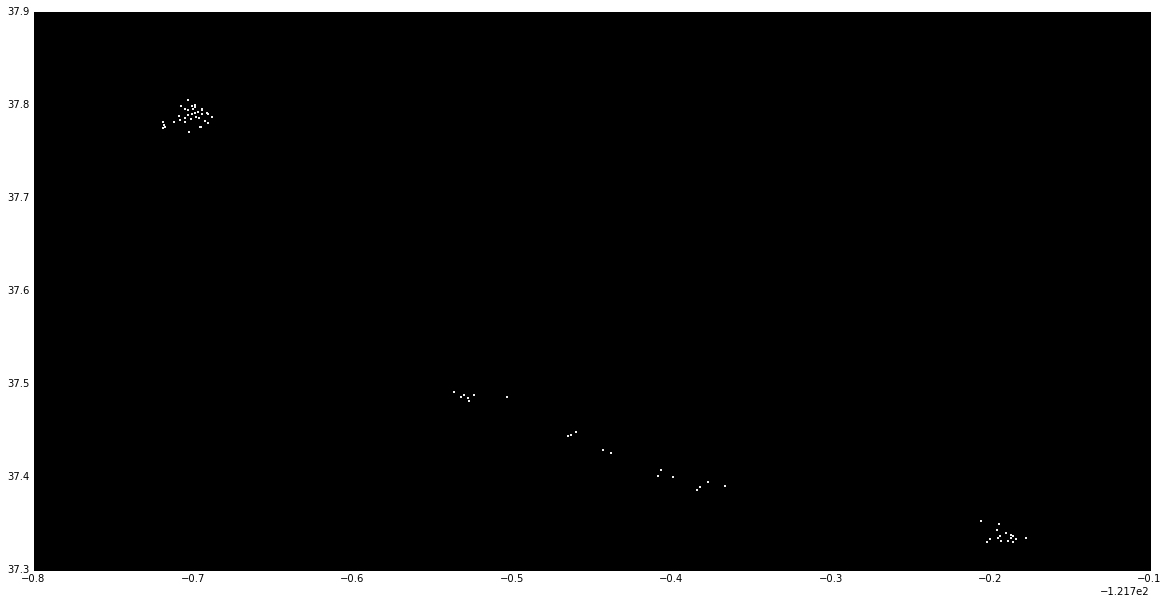

In [19]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
ax.set_axis_bgcolor('black')
plt.scatter( x=df['Start Longitude'], y=df['Start Latitute'], color='white', s=.02,alpha=.6)